# Goodreads Reviews Basic Statistics

This notebook reads a gzipped JSON file of Goodreads reviews, extracts the review date and rating, and produces two CSV files with aggregated data on a weekly and monthly basis. For each period, the notebook computes:

- **review_count**: The number of reviews
- **avg_rating**: The average rating
- **running_review_count**: A cumulative total of reviews over time

Make sure that your JSON objects include a date field (here assumed to be called `date`) and a numeric rating (assumed as `rating`). Adjust the field names as needed if your data differs.

In [15]:
import gzip
import json
import pandas as pd
from dateutil.relativedelta import relativedelta






In [ ]:
df = pd.read_parquet("datasets/reviews_parquet_monthed.parquet")
df = df.astype({
    "rating": "int8",
    "month": "uint8",
    "book_id": "int32"
})
display(df)


KeyboardInterrupt: 

In [ ]:
df.sort_values(by=['book_id', 'month'], inplace=True)

In [ ]:
print(df.head(20))   # Inspect the first few rows

          rating  book_id  month
1303657        5        1      2
1745158        4        1      2
13354106       3        1      2
3059000        3        1      3
3317337        5        1      3
3728528        5        1      3
4514319        1        1      3
5797160        5        1      3
5804524        4        1      3
7680642        3        1      3
8008019        4        1      3
8411005        5        1      3
9157201        5        1      3
15015403       5        1      3
15258738       3        1      3
9108747        4        1      4
10967722       5        1      4
11487746       4        1      4
59123          5        1      5
77191          5        1      5


In [ ]:

# --- Monthly Aggregation with Month Start Frequency ---
# Using 'MS' (month start) so that the date in the aggregation represents the first day of the month
monthly = df.groupby(['book_id', "month"]).agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Compute cumulative sum of review_count for each book id
monthly['running_review_count'] = monthly.groupby('book_id')['review_count'].cumsum()



In [ ]:
print(monthly)


          book_id  month  review_count  avg_rating  running_review_count
0               1      2             3    4.000000                     3
1               1      3            12    4.000000                    15
2               1      4             3    4.333333                    18
3               1      5            20    4.400000                    38
4               1      6            17    3.705882                    55
...           ...    ...           ...         ...                   ...
7911935  36514196    131             1    5.000000                     1
7911936  36515426    129             1    4.000000                     1
7911937  36517786    131             1    5.000000                     1
7911938  36524503    131             1    0.000000                     1
7911939  36529314    131             1    5.000000                     1

[7911940 rows x 5 columns]


In [ ]:
import numpy as np

unique_ids = df['book_id'].unique()
max_mon = df["month"].max() + 1
try:
    del df
except:
    pass



In [ ]:
int_columns = [f"_int_{i}" for i in range(max_mon)]
float_columns = [f"_float_{i}" for i in range(max_mon)]

df = pd.DataFrame({
    "book_id": unique_ids.astype("int32"),  # Ensure book_id is int32
    **{col: np.zeros(len(unique_ids), dtype=np.int32) for col in int_columns},  # Preallocate int32
    **{col: np.zeros(len(unique_ids), dtype=np.float32) for col in float_columns}  # Preallocate float32
})

In [ ]:
display(df)

,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,36514196,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2080067,36515426,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2080068,36517786,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2080069,36524503,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(max_mon):
    int_col = f"_int_{i}"
    float_col = f"_float_{i}"
    old_int_col = f"_int_{i-1}"
    old_float_col = f"_float_{i-1}"
    filtered = monthly[monthly["month"] == i].reset_index(drop=True)

    print("i:", i)
    if i == 0:
        df = df.merge(filtered[['review_count', 'avg_rating', "book_id"]], left_on='book_id', right_on='book_id', how='left')
        # Fill missing values with 0, ensuring correct formatting
        display(df)
        df[int_col] = df["review_count"].fillna(0).astype(int)  # Ensure int type
        df[float_col] = df['avg_rating'].fillna(0).astype(float)  # Ensure float type

        # Drop temporary columns used for merging
        df.drop(columns=['review_count', 'avg_rating'], inplace=True)
    else:
        df = df.merge(filtered[['review_count', 'avg_rating', "book_id"]], left_on='book_id', right_on='book_id', how='left')
        df["review_count"] = df["review_count"].fillna(0).astype(int)  # Ensure int type
        df["avg_rating"] = df['avg_rating'].fillna(0).astype(float)  # Ensure float type
        df[int_col] = df[old_int_col] + df["review_count"]
        df[float_col] = (df[old_float_col] * df[old_int_col] + df["review_count"] * df["avg_rating"])/(df[old_int_col]+df["review_count"])
        df[float_col].fillna(0, inplace=True)
        df.drop(columns=['review_count', 'avg_rating', "date_x", "date_y", "date"], inplace=True, errors="ignore")

i: 0


,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131,review_count,avg_rating
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
2,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,36514196,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2080067,36515426,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2080068,36517786,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2080069,36524503,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 28
i: 29
i: 30
i: 31
i: 32
i: 33
i: 34
i: 35
i: 36
i: 37
i: 38
i: 39
i: 40
i: 41
i: 42
i: 43
i: 44
i: 45
i: 46
i: 47
i: 48
i: 49
i: 50
i: 51
i: 52
i: 53
i: 54
i: 55
i: 56
i: 57
i: 58
i: 59
i: 60
i: 61
i: 62
i: 63
i: 64
i: 65
i: 66
i: 67
i: 68
i: 69
i: 70
i: 71
i: 72
i: 73
i: 74
i: 75
i: 76
i: 77
i: 78
i: 79
i: 80
i: 81
i: 82
i: 83
i: 84
i: 85
i: 86
i: 87
i: 88
i: 89
i: 90
i: 91
i: 92
i: 93
i: 94
i: 95
i: 96
i: 97
i: 98
i: 99
i: 100
i: 101
i: 102
i: 103
i: 104
i: 105
i: 106
i: 107
i: 108
i: 109
i: 110
i: 111
i: 112
i: 113
i: 114
i: 115
i: 116
i: 117
i: 118
i: 119
i: 120
i: 121
i: 122
i: 123
i: 124
i: 125
i: 126
i: 127
i: 128
i: 129
i: 130
i: 131


In [ ]:
display(df)
print(df.dtypes)

,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,1,0,0,3,15,18,38,55,88,119,...,4.511390,4.513277,4.514829,4.514587,4.514641,4.517289,4.517711,4.518559,4.518238,4.518368
1,2,1,1,3,13,16,32,45,72,105,...,4.358516,4.359597,4.362507,4.360075,4.359479,4.363109,4.363184,4.364749,4.365644,4.365809
2,3,0,0,3,15,29,39,67,111,162,...,4.439174,4.438383,4.436554,4.434846,4.433846,4.435049,4.433270,4.433669,4.434130,4.434263
3,4,0,0,0,1,2,3,6,10,10,...,4.302326,4.302326,4.333333,4.333333,4.333333,4.239130,4.239130,4.255319,4.255319,4.255319
4,5,0,0,0,4,8,13,26,39,72,...,4.595233,4.595136,4.595408,4.592126,4.594133,4.594062,4.595274,4.595772,4.596465,4.596465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,36514196,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080067,36515426,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000
2080068,36517786,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080069,36524503,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


book_id         int32
_int_0          int64
_int_1          int64
_int_2          int64
_int_3          int64
               ...   
_float_127    float64
_float_128    float64
_float_129    float64
_float_130    float64
_float_131    float64
Length: 265, dtype: object


In [ ]:
int_columns = [col for col in df.columns if col.startswith('_int_')]
float_columns = [col for col in df.columns if col.startswith('_float_')]

df[float_columns] = df[float_columns].astype(np.float32)
df[int_columns] = df[int_columns].astype(np.uint16)

print(df.dtypes)
display(df)

book_id         int32
_int_0         uint16
_int_1         uint16
_int_2         uint16
_int_3         uint16
               ...   
_float_127    float32
_float_128    float32
_float_129    float32
_float_130    float32
_float_131    float32
Length: 265, dtype: object


,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,1,0,0,3,15,18,38,55,88,119,...,4.511390,4.513277,4.514829,4.514587,4.514641,4.517289,4.517711,4.518559,4.518239,4.518368
1,2,1,1,3,13,16,32,45,72,105,...,4.358517,4.359597,4.362507,4.360075,4.359479,4.363110,4.363184,4.364749,4.365644,4.365809
2,3,0,0,3,15,29,39,67,111,162,...,4.439174,4.438383,4.436554,4.434846,4.433846,4.435049,4.433270,4.433669,4.434130,4.434263
3,4,0,0,0,1,2,3,6,10,10,...,4.302326,4.302326,4.333333,4.333333,4.333333,4.239130,4.239130,4.255319,4.255319,4.255319
4,5,0,0,0,4,8,13,26,39,72,...,4.595232,4.595136,4.595408,4.592125,4.594133,4.594061,4.595274,4.595772,4.596465,4.596465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,36514196,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080067,36515426,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000
2080068,36517786,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080069,36524503,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Write the results to CSV files
monthly.to_parquet('datasets/monthly_review_stats.parquet')
df.to_parquet("datasets/running_df.parquet")

: 

In [ ]:
import pandas as pd
df = pd.read_parquet("datasets/running_df.parquet")
display(df)

,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,1,0,0,3,15,18,38,55,88,119,...,4.511390,4.513277,4.514829,4.514587,4.514641,4.517289,4.517711,4.518559,4.518239,4.518368
1,2,1,1,3,13,16,32,45,72,105,...,4.358517,4.359597,4.362507,4.360075,4.359479,4.363110,4.363184,4.364749,4.365644,4.365809
2,3,0,0,3,15,29,39,67,111,162,...,4.439174,4.438383,4.436554,4.434846,4.433846,4.435049,4.433270,4.433669,4.434130,4.434263
3,4,0,0,0,1,2,3,6,10,10,...,4.302326,4.302326,4.333333,4.333333,4.333333,4.239130,4.239130,4.255319,4.255319,4.255319
4,5,0,0,0,4,8,13,26,39,72,...,4.595232,4.595136,4.595408,4.592125,4.594133,4.594061,4.595274,4.595772,4.596465,4.596465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,36514196,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080067,36515426,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000
2080068,36517786,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2080069,36524503,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import pandas as pd
df_mon = pd.read_parquet("datasets/monthly_review_stats.parquet")
display(df_mon)

,book_id,month,review_count,avg_rating,running_review_count
0,1,2,3,4.000000,3
1,1,3,12,4.000000,15
2,1,4,3,4.333333,18
3,1,5,20,4.400000,38
4,1,6,17,3.705882,55
...,...,...,...,...,...
7911935,36514196,131,1,5.000000,1
7911936,36515426,129,1,4.000000,1
7911937,36517786,131,1,5.000000,1
7911938,36524503,131,1,0.000000,1


,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
2,3,0,0,3,15,29,39,67,111,162,...,4.439174,4.438383,4.436554,4.434846,4.433846,4.435049,4.433270,4.433669,4.434130,4.434263
9874,19063,0,0,0,5,8,14,27,41,62,...,4.391892,4.391764,4.391590,4.391230,4.391133,4.391130,4.391208,4.391424,4.391947,4.391947
19574,41865,0,0,0,5,8,16,25,41,74,...,3.320487,3.320173,3.320123,3.319257,3.317960,3.317736,3.317222,3.316454,3.315645,3.315425
88588,256683,0,0,0,0,0,0,0,0,5,...,3.720311,3.719893,3.718862,3.718252,3.717630,3.717129,3.716846,3.717763,3.717760,3.717792
445614,2767052,0,0,0,0,0,0,0,0,0,...,4.328387,4.328699,4.328253,4.328314,4.327743,4.327677,4.327364,4.327189,4.326906,4.326906
523247,4667024,0,0,0,0,0,0,0,0,0,...,4.368266,4.368912,4.369472,4.369193,4.368819,4.369377,4.369465,4.370096,4.370555,4.370555
562353,6148028,0,0,0,0,0,0,0,0,0,...,4.242627,4.242599,4.242691,4.242465,4.241551,4.242003,4.241194,4.241052,4.241095,4.241095
654106,7260188,0,0,0,0,0,0,0,0,0,...,3.809066,3.809378,3.809460,3.809464,3.809231,3.808917,3.808474,3.808514,3.808792,3.808880
721417,8442457,0,0,0,0,0,0,0,0,0,...,3.805478,3.805305,3.804810,3.804852,3.804852,3.804852,3.804852,3.804852,3.804852,3.804852
761738,9361589,0,0,0,0,0,0,0,0,0,...,4.005758,4.005707,4.004731,4.003298,4.001877,4.001632,4.000232,3.999306,3.998616,3.998616


In [ ]:
trans_df = pd.read_parquet("datasets/metadata.parquet")
trans_df = trans_df.reset_index()
display(trans_df)

,book_id,isbn,title,isbn13
0,5333265,312853122.0,W.C. Fields: A Life on Film,9.780313e+12
1,1333909,743509986.0,Good Harbor,9.780744e+12
2,7327624,NaN,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",NaN
3,6066819,743294297.0,Best Friends Forever,9.780743e+12
4,287140,850308712.0,Runic Astrology: Starcraft and Timekeeping in ...,9.780850e+12
...,...,...,...,...
2360650,3084038,563553014.0,"This Sceptred Isle, Vol. 10: The Age of Victor...",9.780564e+12
2360651,26168430,NaN,Sherlock Holmes and the July Crisis,9.781781e+12
2360652,2342551,765197456.0,The Children's Classic Poetry Collection,9.780765e+12
2360653,22017381,NaN,"101 Nights: Volume One (101 Nights, #1-3)",9.781624e+12


In [ ]:
def get_duplicate_book_ids(trans_df):
    # Standardize the title strings for consistency
    trans_df['title'] = trans_df['title'].str.strip().str.lower()
    
    # Group by title and get a list of unique book_ids for each title
    duplicate_book_ids = trans_df.groupby('title')['book_id'].apply(list).reset_index()
    
    return duplicate_book_ids

# Example usage:
duplicate_book_ids = get_duplicate_book_ids(trans_df)
#display(duplicate_book_ids)
print(duplicate_book_ids.head())

                                    title   
0                                          \
1            ! .. عشان ما تنضربش على قفاك   
2  ! الجندبُ يَلهو حُرًا في شوارع القاهرة   
3                    !!امرأة.. تحاور أفعى   
4                        !!شعراء إرهابيون   

                                             book_id  
0  [2433394, 6046733, 29522179, 23280835, 1019200...  
1                                          [3561784]  
2                                         [17981767]  
3                                         [10452246]  
4                                         [12290150]  


In [4]:
exploded = duplicate_book_ids.explode('book_id')

# Step 2: Merge with other_df on the matching book_id.
merged_df = exploded.merge(df, left_on='book_id', right_on='book_id')

# Now merged_df contains the 'title' from the first DataFrame alongside details from other_df.
display(merged_df)

,title,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,,2433394,0,0,0,0,0,0,0,0,...,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
1,,6046733,0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,,29522179,0,0,0,0,0,0,0,0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,,23280835,0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,,10192004,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,25453806,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2080067,ｍの劣情 [m no retsujou],10192498,0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2080068,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,23829170,0,0,0,0,0,0,0,0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2080069,ｘｂｌａｄｅ（１０）,19306468,0,0,0,0,0,0,0,0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [6]:
del exploded
del duplicate_book_ids

In [5]:
merged_df = merged_df.dropna(subset=['title'])
merged_df = merged_df[merged_df['title'].str.strip() != '']

display(merged_df)

,title,book_id,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
7,! .. عشان ما تنضربش على قفاك,3561784,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
8,!!شعراء إرهابيون,12290150,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
9,!búscalo! (look it up!): a quick reference gui...,1404770,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
10,!exacto!: a practical guide to spanish grammar,1570279,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
11,!feliz navidad: celebrating a mexican christmas,27162594,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080066,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,25453806,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2080067,ｍの劣情 [m no retsujou],10192498,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
2080068,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,23829170,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
2080069,ｘｂｌａｄｅ（１０）,19306468,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
merged_df.to_parquet("datasets/merged.parquet")

In [ ]:
import pandas as pd
merged_df = pd.read_parquet("datasets/merged.parquet")
print(merged_df.dtypes)

title          object
book_id         int64
_int_0         uint16
_int_1         uint16
_int_2         uint16
               ...   
_float_127    float32
_float_128    float32
_float_129    float32
_float_130    float32
_float_131    float32
Length: 266, dtype: object


In [2]:
int_columns = [col for col in merged_df.columns if col.startswith('_int_')]
float_columns = [col for col in merged_df.columns if col.startswith('_float_')]

sum_int_columns = merged_df.groupby('title')[int_columns].sum()

# Compute weighted averages using vectorized operations
weighted_avg_columns = pd.DataFrame({
    f_col: (merged_df[f_col] * merged_df[i_col]).groupby(merged_df['title']).sum() / sum_int_columns[i_col]
    for i_col, f_col in zip(int_columns, float_columns)
})

# Handling cases where division by zero occurs (e.g., no reviews for a title)
weighted_avg_columns = weighted_avg_columns.fillna(0)


# Combine results into a single DataFrame
aggregated = pd.concat([sum_int_columns, weighted_avg_columns], axis=1)

aggregated = aggregated.reset_index()

display(aggregated)

,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [4]:
display(aggregated)
print(aggregated.dtypes)

,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


title          object
_int_0         uint16
_int_1         uint16
_int_2         uint16
_int_3         uint16
               ...   
_float_127    float32
_float_128    float32
_float_129    float32
_float_130    float32
_float_131    float32
Length: 265, dtype: object


In [16]:
top_books = aggregated.nlargest(15, '_int_130')['title'].unique()
print(top_books)
filtered_df = aggregated[aggregated['title'].isin(top_books)]
int_columns = [col for col in filtered_df.columns if col.startswith('_int_')]
display(filtered_df)
print(len(top_books))

['the fault in our stars' 'the hunger games (the hunger games, #1)'
 'gone girl' 'divergent (divergent, #1)' 'the girl on the train'
 'mockingjay (the hunger games, #3)' 'the book thief'
 'catching fire (the hunger games, #2)'
 'fifty shades of grey (fifty shades, #1)'
 'me before you (me before you, #1)' 'allegiant (divergent, #3)'
 'the martian' 'ready player one' 'twilight (twilight, #1)'
 'eleanor & park']


,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
75643,"allegiant (divergent, #3)",0,0,0,0,0,0,0,0,0,...,3.283860,3.283425,3.283192,3.282474,3.282195,3.282530,3.281755,3.281641,3.281572,3.281713
201163,"catching fire (the hunger games, #2)",0,0,0,0,0,0,0,0,0,...,4.239788,4.239767,4.239816,4.239618,4.238833,4.239305,4.238672,4.238682,4.238838,4.238838
312247,"divergent (divergent, #1)",0,0,0,0,0,0,0,0,0,...,4.072989,4.071883,4.071514,4.070754,4.070391,4.070292,4.070389,4.070052,4.069144,4.069144
350530,eleanor & park,0,0,0,0,0,0,0,0,0,...,4.141681,4.140717,4.139513,4.136121,4.135703,4.131779,4.131142,4.129696,4.128182,4.128182
390963,"fifty shades of grey (fifty shades, #1)",0,0,0,0,0,0,0,0,0,...,2.666480,2.665313,2.664258,2.664632,2.663660,2.662556,2.662430,2.661829,2.661332,2.661332
444380,gone girl,0,0,0,0,0,0,0,0,0,...,3.773780,3.773402,3.772961,3.773367,3.773789,3.774074,3.774879,3.775015,3.774886,3.774886
695705,"me before you (me before you, #1)",0,0,0,0,0,0,0,0,0,...,4.275976,4.275743,4.274751,4.273392,4.272536,4.271876,4.271754,4.271610,4.271422,4.271422
716768,"mockingjay (the hunger games, #3)",0,0,0,0,0,0,0,0,0,...,3.813097,3.813286,3.813368,3.813441,3.813230,3.813023,3.812619,3.812676,3.812750,3.812828
870122,ready player one,0,0,0,0,0,0,0,0,0,...,4.233732,4.231950,4.232110,4.231224,4.230651,4.226158,4.224329,4.223245,4.222488,4.222365
1059202,the book thief,0,0,0,5,8,15,30,44,65,...,4.386842,4.387252,4.385522,4.385367,4.385418,4.385238,4.385012,4.385283,4.385607,4.385607


15


In [3]:
aggregated.to_parquet("consolidated.parquet")

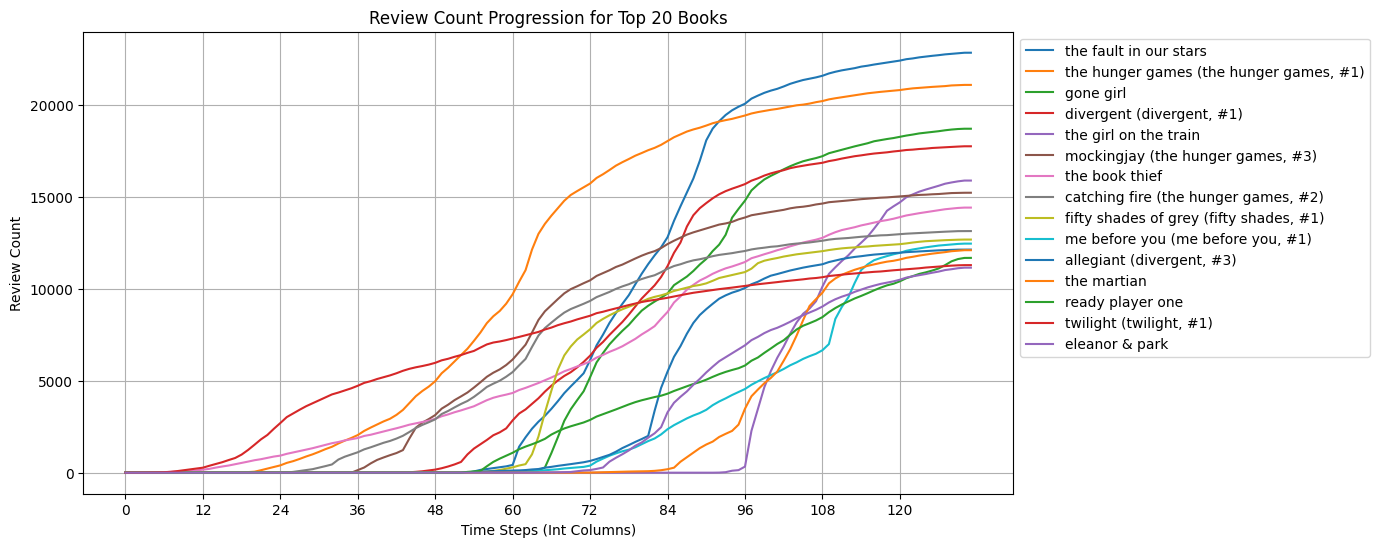

In [ ]:
import matplotlib.pyplot as plt

df = aggregated

time_steps = [int(col.replace('_int_', '')) for col in int_columns]
int_columns = [col for col in df.columns if col.startswith('_int_')]
float_columns = [col for col in df.columns if col.startswith('_float_')]

plt.figure(figsize=(12, 6))
for book_title in top_books:
    book_data = filtered_df[filtered_df['title'] == book_title][int_columns].T  # Transpose for plotting
    # Get book title from trans_df
    plt.plot(time_steps, book_data, label=book_title)

# Format the x-axis to show only every 12th time step
plt.xticks(time_steps[::12], labels=time_steps[::12])

plt.xlabel('Time Steps (Int Columns)')
plt.ylabel('Review Count')
plt.title('Review Count Progression for Top 20 Books')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
